# <span style='background:#f2bc74'>**Put your Name here:**  </span>

Complete this assignment by copying and then editing this Jupyter Notebook.  Submit your completed Jupyter Notebook `.ipynb` file on Canvas.  If you can also convert your `.ipynb` file to a `.pdf` file, please do that as well.  If not, I will convert your `.ipynb` file to a `.pdf` file for you.

# Computational Assignment 3

In this assignment we will explore different bases for the vector space of polynomials.

Let $\mathbb{P}_n$ denote the vector space of polynomials in a single variable (which we'll usually call $x$) with real coefficients and of degree at most $n$.
$$ \mathbb{P}_n = \{a_0 + a_1 x + a_2 x^2 + \ldots + a_k x^k + \ldots + a_n x^n : a_0,a_1,\dots,a_n \in \mathbb{R} \} $$

## Interpolation

For the $n+1$ data values $$(x_0,y_0),(x_1,y_1),\dots,(x_n,y_n)$$ with distinct $x$-values, there is a unique polynomial $p(x)$ in $\mathbb{P}_n$ such that $p(x_i)=y_i$ for $i=0,1,\dots,n$.
(Note that while the $x_i$s must be distinct, the $y_i$s need not be.)
This follows from the fact that there cannot be more roots of a polynomial than its degree, unless it is the zero polynomial.

For small $n$, this is often stated as:
1. Two points determine a line.
2. Three points determine a quadratic (in this case, a parabola).

*Interpolation* is the process of producing the polynomial $p(x)$ from the $n+1$ data values.  We will explore the process of interpolation using different bases for $\mathbb{P}_n$.

## The standard basis

The *standard basis* for $\mathbb{P}_n$ is the set $\{1,x,x^2,\dots,x^n\}$.

Suppose that we have $n+1$ data values $$(x_0,y_0),(x_1,y_1),\dots,(x_n,y_n),$$ and we want to fit the polynomial $$p(x)=a_0 + a_1 x + a_2 x^2 + \ldots + a_n x^n.$$  That is, we want to find the coefficients $a_0,a_1,\dots,a_n$ such that
$$
\begin{align}
p(x_0) = a_0 + a_1 x_0 + a_2 x_0^2 + \ldots + a_n x_0^2 &= y_0 \\
p(x_1) = a_0 + a_1 x_1 + a_2 x_1^2 + \ldots + a_n x_1^2 &= y_1 \\
p(x_2) = a_0 + a_1 x_2 + a_2 x_2^2 + \ldots + a_n x_2^2 &= y_2 \\
\vdots & \\
p(x_n) = a_0 + a_1 x_n + a_2 x_n^2 + \ldots + a_n x_n^2 &= y_n \\
\end{align}
$$
This is a system of $n+1$ linear equations, where the unknown variables are 
$$\mathbf{a}=\begin{bmatrix} a_0 \\ a_1 \\ \vdots \\ a_n\end{bmatrix}$$ 
and the right side is 
$$\mathbf{y}=\begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_n\end{bmatrix}.$$
The coefficient matrix $V$ is 
$$V=\begin{bmatrix}
1 & x_0 & x_0^2 & \dots & x_0^n \\
1 & x_1 & x_1^2 & \dots & x_1^n \\
1 & x_2 & x_2^2 & \dots & x_2^n \\
\vdots \\
1 & x_n & x_n^2 & \dots & x_n^n \\
\end{bmatrix}.$$
The $(n+1)\times(n+1)$ matrix $V$ is called a *Vandermonde matrix*.

To solve for the coeffcients $\mathbf{a}$, we thus solve the matrix equation $$V\mathbf{a}=\mathbf{y}.$$

***Note.*** Be careful about the indexing here.  The first data point $(x_0,y_0)$, and the first coefficient is $a_0$.  This works nicely with Python/SymPy's $0$-indexing.

*Comment.* This feels a little bit different than our standard process for writing a vector as a linear combination of basis elements.  The difference comes from the fact that here the vector $p(x)$ is implicitly described by its values $y_0,y_1,\ldots,y_n$ when evaluated at $x_0,x_1,\ldots,x_n$.  We are really writing $\mathbf{y}$ as a linear combination of the basis elements evaluated at $\mathbf{x}$.


# Question 1a

Find the coefficients $\mathbf{a}$ of the polynomial of degree at most $6$ that fits the data values given below (in the vectors $\mathbf{x}$ and $\mathbf{y}$).

*Note.* For forming the matrix $V$, it might be helpful to use SymPy's capability to define each entry as a function of the indices $i$ and $j$.  See example below.

Below is shown an image of the data values (in red) and the polynomial of degree at most $6$ (in blue) that interpolates those points.  The value of the polynomial at $x=3$ is shown in green.

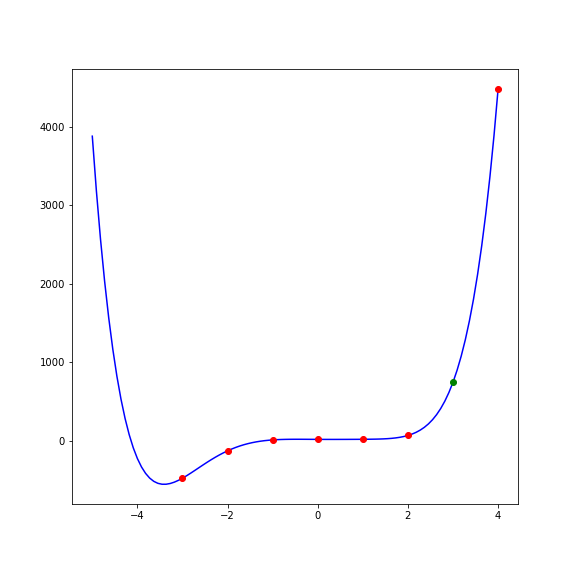

In [ ]:
from sympy import *  # remember to run this cell!

In [ ]:
# example of defining Matrix by specifying cells as a function of the indices.

A=Matrix(4,3,lambda i,j: i+j**2)  # i plus j squared

In [ ]:
x=Matrix([-3,-2,-1,0,1,2,4])  # x[0] is x_0, x[1] is x_1, etc
x

In [ ]:
y=Matrix([-478,-129,10,17,18,67,4485])
y

# Question 1b

Interpolate the value for $x=3$ (ie, compute $p(3)$ using your interpolated polynomial $p(x)$).

## Basis of Newton polynomials

The Newton polynomials depend on the $x$-coordinates of the data values.  For the $n+1$ data values $$(x_0,y_0),(x_1,y_1),\dots,(x_n,y_n),$$ the Newton polynomials
$$\begin{align}
N_0(x) &= 1 \\
N_1(x) &= (x-x_0) \\
N_2(x) &= (x-x_0)(x-x_1) \\
\vdots \\
N_j(x) &= (x-x_0)(x-x_1)\cdots (x-x_{j-1}) = \prod_{k=0}^{j-1}(x-x_k) \\
\vdots \\
N_n(x) &= (x-x_0)(x-x_1)\cdots (x-x_{n-1})
\end{align}$$
form a basis for $\mathbb{P}_n$.  Note that the Newton polynomial $N_j(x)$ has degree $i$.

Again, we wish to find the interpolating polynomial $p(x)$, but now we represent $p(x)$ as a linear combination of Newton polynomials:
$$ p(x)=b_0 N_0(x) + b_1 N_1(x) + \ldots + b_n N_n(x).$$

To solve for the coefficients, we construct the matrix $M$ where 
$$M=\begin{bmatrix}
N_0(x_0) & N_1(x_0) & N_2(x_0) & \dots & N_n(x_0) \\
N_0(x_1) & N_1(x_1) & N_2(x_1) & \dots & N_n(x_1) \\
N_0(x_2) & N_1(x_2) & N_2(x_2) & \dots & N_n(x_2) \\
\vdots \\
N_0(x_n) & N_1(x_n) & N_2(x_n) & \dots & N_n(x_n) \\
\end{bmatrix}.$$
We wish to solve the matrix equation $$M\mathbf{b}=\mathbf{y},$$
where $\mathbf{b}$ is the vector of unknown coefficients: 
$$\mathbf{b}=\begin{bmatrix} b_0 \\ b_1 \\ \vdots \\ b_n \end{bmatrix}.$$

# Question 2a

Find the coordinates $\mathbf{b}$ in the Newton basis of the polynomial of degree at most $6$ that fits the data values given in the vectors $\mathbf{x}$ and $\mathbf{y}$ from above.

# Question 2b

Interpolate the value for $x=3$ using the polynomial $p(x)$ written in terms of the Newton basis.

# Question 2c

Comment on how easy or hard it is to solve the linear system $M\mathbf{b}=\mathbf{y}$ compared to the linear system $V\mathbf{a}=\mathbf{y}$, particularly if $n$ is large. (Note that this question is asking about solving the linear system *after* it is set up; the difficulty does not include finding the coefficient matrix.)

Write your answer here: (double click to write in the cell)

## Basis of Lagrange polynomials

Like the Newton polynomials, the Lagrange polynomials depend on the $x$-coordinates of the data values.  For the $n+1$ data values $$(x_0,y_0),(x_1,y_1),\dots,(x_n,y_n),$$ the Lagrange polynomials
$$\begin{align}
L_0(x) &= (x-x_1)(x-x_2)\cdots(x-x_n) \\
L_1(x) &= (x-x_0)(x-x_2)\cdots(x-x_n) \\
L_2(x) &= (x-x_0)(x-x_1)(x-x_3)\cdots(x-x_n) \\
\vdots \\
L_j(x) &= (x-x_0)\cdots (x-x_{j-1})(x-x_{j+1})\cdots(x-x_n) = \prod_{\substack{k=0}{k\ne j}}^{n}(x-x_k) \\
\vdots \\
L_n(x) &= (x-x_0)(x-x_1)\cdots (x-x_{n-1})
\end{align}$$
form a basis for $\mathbb{P}_n$.  Note that each Lagrange polynomial $L_k(x)$ has degree $n$.

Again, we wish to find the interpolating polynomial $p(x)$, but now we represent $p(x)$ as a linear combination of Lagrange polynomials:
$$ p(x)=c_0 L_0(x) + c_1 L_1(x) + \ldots + c_n L_n(x).$$

To solve for the coefficients, we construct the matrix $K$ where 
$$K=\begin{bmatrix}
L_0(x_0) & L_1(x_0) & L_2(x_0) & \dots & L_n(x_0) \\
L_0(x_1) & L_1(x_1) & L_2(x_1) & \dots & L_n(x_1) \\
L_0(x_2) & L_1(x_2) & L_2(x_2) & \dots & L_n(x_2) \\
\vdots \\
L_0(x_n) & L_1(x_n) & L_2(x_n) & \dots & L_n(x_n) \\
\end{bmatrix}.$$
We wish to solve the matrix equation $$K\mathbf{c}=\mathbf{y},$$
where $\mathbf{c}$ is the vector of unknown coefficients: 
$$\mathbf{c}=\begin{bmatrix} c_0 \\ c_1 \\ \vdots \\ c_n \end{bmatrix}.$$

# Question 3a

Find the coordinates $\mathbf{b}$ in the Newton basis of the polynomial of degree at most $6$ that fits the data values given in the vectors $\mathbf{x}$ and $\mathbf{y}$ from above.

# Question 3b

Interpolate the value for $x=3$ using the polynomial $p(x)$ written in terms of the Lagrange basis.

# Question 3c

Comment on how easy or hard it is to solve the linear system $K\mathbf{c}=\mathbf{y}$ compared to the linear systems $V\mathbf{a}=\mathbf{y}$ and $M\mathbf{b}=\mathbf{y}$, particularly when $n$ is large. (Note that this question is asking about solving the linear system *after* it is set up; the difficulty does not include finding the coefficient matrix.)

Write your answer here: (double click to write in the cell)